In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
P0 = 101325
T0 = 273.15
DH_vap = 3.1 * 10**(4) #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C67641&Mask=4#Thermo-Phase
R = 8.314 #[J * K^−1 * mol^−1]

def Kelvin_Celsius(t):
    """
    This function converts Temperature values from Kelvin to degrees Celsius
    """
    return t-273.15

def Celsius_Kelvin(t):
    """
    This function converts Temperature values from degrees Celsius to Kelvin
    """
    return t+273.15

def p_height(h):
    """
    This function calculates the pressure excerted by the column of water at a given depth
    """
    return 1000*9.81*h + P0

# Approach 1: Approximate Estimation

https://hbcp.chemnetbase.com/faces/documents/15_03/15_03_0001.xhtml

Formula:

$T_B = 56.08$ [°C]
$T_B = 329.22$ [K]

$P = 101325$ [Pa]

$T_B(P) = 0.289*P/1000 + X$

$X = T_B(P)-0.289*P/1000$

$X = 329.22-0.289*101325/1000$

$X = 299.947$

$T_B(P) = 0.289*P/1000 + 299.947$

In [3]:
def T_boil(P):
    return 0.289*P/1000+299.947#return P0*math.exp((1/T0-1/Celsius_Kelvin(t))*DH_vap/R)

In [4]:
def P_estim(T):
    return (T-299.947)*1000/0.289

# Approach 2: Using Clausius Clapeyron equation

https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Physical_Chemistry_(LibreTexts)/23%3A_Phase_Equilibria/23.04%3A_The_Clausius-Clapeyron_Equation eq 23.4.26

In [5]:
TR, PR = 272.95, 9290 #http://www.ddbst.com/en/EED/PCP/VAP_C4.php
T0 = TR
T = np.arange(T0, T0+80+1, 1)

#Calculate the constant C, the intersection with the y-axis
C = np.log(PR) + DH_vap/(R*TR)

def Pt(t):
    return np.exp(-DH_vap/(R*t) + C)# * x

# Approach 3: Using Antoine equation

In [6]:
DH_vap

31000.0

In [7]:
def P_Antoine(T):
    return 10**(4.42448 - (1312.253 / (T - 32.445)))*100000

# Plot Comparison

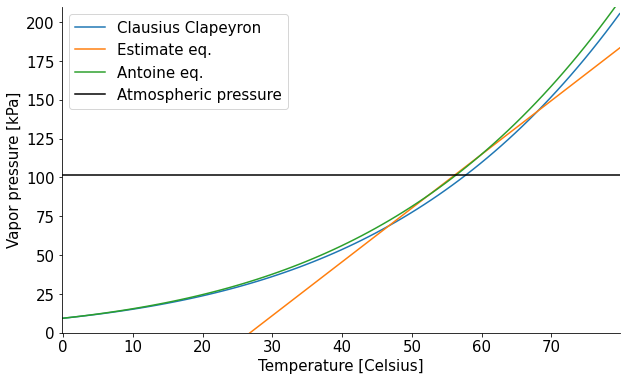

In [15]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

fig1 = plt.figure(figsize=(10,6))
#plt.title(f"Acetone Vapor Pressure")
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+80, 0, 210])
plt.plot(Kelvin_Celsius(T), Pt(T)/1000)
plt.plot(Kelvin_Celsius(T), P_estim(T)/1000)
plt.plot(Kelvin_Celsius(T), P_Antoine(T)/1000)
plt.axhline(y = P0/1000, color = 'black', linestyle = '-')
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel('Vapor pressure [kPa]', fontsize=15)
plt.legend(["Clausius Clapeyron","Estimate eq.","Antoine eq.", "Atmospheric pressure"], fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()